In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
company_df = pd.read_csv('histories/apple.csv')

In [3]:
company_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023106,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021900,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020293,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020795,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021398,18362400.0


In [4]:
company_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [5]:
company_df['Date'] = pd.to_datetime(company_df['Date'])

In [6]:
company_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023106,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021900,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020293,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020795,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021398,18362400.0


In [7]:
company_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [8]:
company_recent_df = company_df[-1000:]

In [9]:
def create_timestamp(year, month=1, day=1):
    return pd.Timestamp('{}-{:02d}-{:02d} 00:00:00'.format(year, month, day))

In [10]:
company_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023106,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021900,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020293,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020795,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021398,18362400.0


In [11]:
company_df["today_diff"] = company_df.Close - company_df.Open

In [12]:
company_df["today_mvt"] = company_df.today_diff.apply(lambda x: 1 if x >= 0 else 0)

In [13]:
company_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,today_diff,today_mvt
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023106,117258400.0,0.000000,1
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021900,43971200.0,-0.002232,0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020293,26432000.0,-0.002232,0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020795,21610400.0,0.000000,1
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021398,18362400.0,0.000000,1


In [14]:
company_df[1:]["today_mvt"].values.shape

(9575,)

In [15]:
company_df["tomorrow_mvt"] = np.concatenate((company_df[1:]["today_mvt"], np.array([None])))

In [16]:
features_to_use = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
number_of_previous_days_to_add = 2

for i in range(1, number_of_previous_days_to_add + 1):
    for feature in features_to_use:
        company_df["{}{}".format(feature, -i)] = np.concatenate((np.array([None]*i), company_df[:-i][feature]))

In [17]:
company_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,today_diff,today_mvt,tomorrow_mvt,...,Low-1,Close-1,Adj Close-1,Volume-1,Open-2,High-2,Low-2,Close-2,Adj Close-2,Volume-2
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023106,117258400.0,0.000000,1,0,...,None,None,None,None,None,None,None,None,None,None
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021900,43971200.0,-0.002232,0,0,...,0.513393,0.513393,0.023106,1.17258e+08,None,None,None,None,None,None
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020293,26432000.0,-0.002232,0,1,...,0.486607,0.486607,0.0219,4.39712e+07,0.513393,0.515625,0.513393,0.513393,0.023106,1.17258e+08
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020795,21610400.0,0.000000,1,1,...,0.450893,0.450893,0.020293,2.6432e+07,0.488839,0.488839,0.486607,0.486607,0.0219,4.39712e+07
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021398,18362400.0,0.000000,1,1,...,0.462054,0.462054,0.020795,2.16104e+07,0.453125,0.453125,0.450893,0.450893,0.020293,2.6432e+07


In [18]:
company_df.dropna(axis=0, inplace=True)

In [19]:
company_df.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                 float64
today_diff             float64
today_mvt                int64
tomorrow_mvt            object
Open-1                  object
High-1                  object
Low-1                   object
Close-1                 object
Adj Close-1             object
Volume-1                object
Open-2                  object
High-2                  object
Low-2                   object
Close-2                 object
Adj Close-2             object
Volume-2                object
dtype: object

In [20]:
company_df['tomorrow_mvt'] = company_df['tomorrow_mvt'].astype(int)

In [23]:
for c in company_df.columns:
    if company_df.dtypes[c] == object:
        company_df[c] = company_df[c].astype(float)

In [24]:
company_df.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                 float64
today_diff             float64
today_mvt                int64
tomorrow_mvt             int32
Open-1                 float64
High-1                 float64
Low-1                  float64
Close-1                float64
Adj Close-1            float64
Volume-1               float64
Open-2                 float64
High-2                 float64
Low-2                  float64
Close-2                float64
Adj Close-2            float64
Volume-2               float64
dtype: object

In [25]:
train_data = company_df[(company_df.Date >= create_timestamp(2005)) & (company_df.Date < create_timestamp(2017))]
test_data = company_df[company_df.Date >= create_timestamp(2017)]

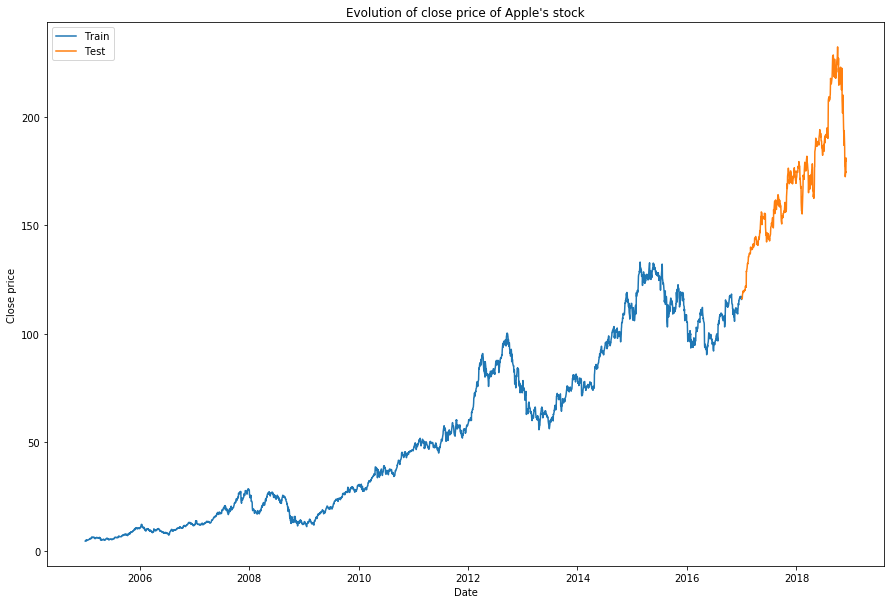

In [26]:
def plot_data(plot_train=True):
    plt.figure(figsize=(15, 10))
    if plot_train:
        plt.plot(train_data.Date, train_data.Close, label='Train', c='C0')
    plt.plot(test_data.Date, test_data.Close, label='Test', c='C1')
    plt.title("Evolution of close price of Apple's stock")
    plt.ylabel("Close price")
    plt.xlabel("Date")

plot_data()
plt.legend()
plt.show()

In [27]:
company_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,today_diff,today_mvt,tomorrow_mvt,...,Low-1,Close-1,Adj Close-1,Volume-1,Open-2,High-2,Low-2,Close-2,Adj Close-2,Volume-2
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020293,26432000.0,-0.002232,0,1,...,0.486607,0.486607,0.021900,43971200.0,0.513393,0.515625,0.513393,0.513393,0.023106,117258400.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020795,21610400.0,0.000000,1,1,...,0.450893,0.450893,0.020293,26432000.0,0.488839,0.488839,0.486607,0.486607,0.021900,43971200.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021398,18362400.0,0.000000,1,1,...,0.462054,0.462054,0.020795,21610400.0,0.453125,0.453125,0.450893,0.450893,0.020293,26432000.0
5,1980-12-19,0.504464,0.506696,0.504464,0.504464,0.022704,12157600.0,0.000000,1,1,...,0.475446,0.475446,0.021398,18362400.0,0.462054,0.464286,0.462054,0.462054,0.020795,21610400.0
6,1980-12-22,0.529018,0.531250,0.529018,0.529018,0.023809,9340800.0,0.000000,1,1,...,0.504464,0.504464,0.022704,12157600.0,0.475446,0.477679,0.475446,0.475446,0.021398,18362400.0


In [28]:
def get_x_y_from_df(df):
    df = df.drop(['Date', 'today_diff', 'today_mvt'], axis=1)
    return df.drop('tomorrow_mvt', axis=1), df['tomorrow_mvt']

In [29]:
x_train, y_train = get_x_y_from_df(train_data)
x_test, y_test = get_x_y_from_df(test_data)

In [30]:
x_train.head()

,Open,High,Low,Close,Adj Close,Volume,Open-1,High-1,Low-1,Close-1,Adj Close-1,Volume-1,Open-2,High-2,Low-2,Close-2,Adj Close-2,Volume-2
6072,4.627143,4.650714,4.471428,4.520714,3.027354,172998000.0,4.635000,4.642857,4.573571,4.600000,3.080449,69647200.0,4.629286,4.645000,4.587143,4.628572,3.099583,86335200.0
6073,4.556428,4.676429,4.497857,4.567143,3.058446,274202600.0,4.627143,4.650714,4.471428,4.520714,3.027354,172998000.0,4.635000,4.642857,4.573571,4.600000,3.080449,69647200.0
6074,4.604286,4.660714,4.575000,4.607143,3.085232,170108400.0,4.556428,4.676429,4.497857,4.567143,3.058446,274202600.0,4.627143,4.650714,4.471428,4.520714,3.027354,172998000.0
6075,4.619286,4.636428,4.523571,4.610714,3.087624,176388800.0,4.604286,4.660714,4.575000,4.607143,3.085232,170108400.0,4.556428,4.676429,4.497857,4.567143,3.058446,274202600.0
6076,4.642857,4.973571,4.625000,4.946429,3.312439,556862600.0,4.619286,4.636428,4.523571,4.610714,3.087624,176388800.0,4.604286,4.660714,4.575000,4.607143,3.085232,170108400.0


In [31]:
y_train.head()

6072    1
6073    1
6074    0
6075    1
6076    0
Name: tomorrow_mvt, dtype: int32

In [34]:
lgbm_classifier.score(x_train, y_train)

0.8907646474677259

In [35]:
lgbm_classifier.score(x_test, y_test)

0.487551867219917

In [38]:
y_train.value_counts() / y_train.shape[0]

1    0.505131
0    0.494869
Name: tomorrow_mvt, dtype: float64

In [39]:
y_test.value_counts() / y_test.shape[0]

1    0.524896
0    0.475104
Name: tomorrow_mvt, dtype: float64

In [40]:
def fit_and_score(model):
    model.fit(x_train, y_train)
    accuracy_train = model.score(x_train, y_train)
    accuracy_test = model.score(x_test, y_test)
    print("Accuracy on train set is {}".format(accuracy_train))
    print("Accuracy on test set is {}".format(accuracy_test))
    return accuracy_train, accuracy_test

In [48]:
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegressionCV

In [54]:
fit_and_score(LGBMClassifier(n_estimators=150))

Accuracy on train set is 0.9275074478649454
Accuracy on test set is 0.47925311203319504


(0.9275074478649454, 0.47925311203319504)

In [49]:
fit_and_score(LogisticRegressionCV(cv=5))

Accuracy on train set is 0.5097649784839458
Accuracy on test set is 0.491701244813278


(0.5097649784839458, 0.491701244813278)

In [52]:
from xgboost import XGBClassifier
fit_and_score(XGBClassifier(n_estimators=150))

Accuracy on train set is 0.735187024164184
Accuracy on test set is 0.47717842323651455


(0.735187024164184, 0.47717842323651455)